In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
import math
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
merged = pd.read_csv('../data/merged_data.csv',index_col='Unnamed: 0')

In [66]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaN
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaN
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaN
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0.0,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.71

In [67]:
merged['Spray Date'] = pd.to_datetime(merged['Spray Date'])
merged['Test Date'] = pd.to_datetime(merged['Test Date'])

In [68]:
# merged.set_index('Date', inplace=True)

### EDA on weather data

#### Visualizations: Temperature

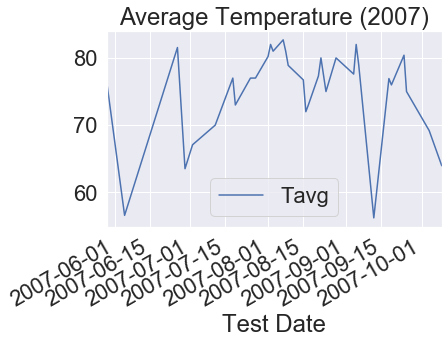

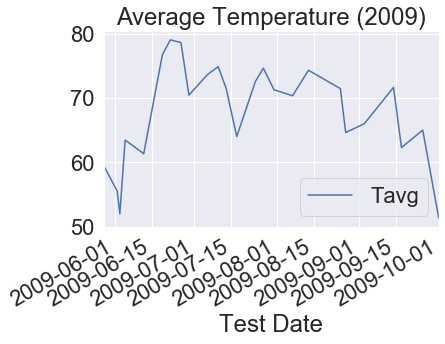

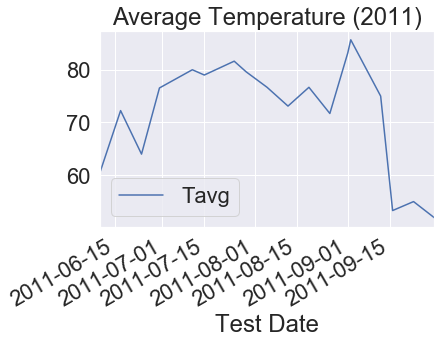

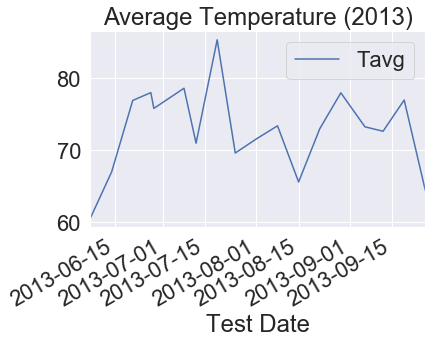

In [69]:
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2007'].plot(title='Average Temperature (2007)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2009'].plot(title='Average Temperature (2009)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2011'].plot(title='Average Temperature (2011)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2013'].plot(title='Average Temperature (2013)')

#### Visualizations: Factors that Affect Number of Mosquitos

In [83]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 78 columns):
Test Date                 10506 non-null datetime64[ns]
Species                   10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
Station                   10506 non-null int64
year                      10506 non-null int64
month                     10506 non-null int64
week                      10506 non-null int64
daylight                  10506 non-null object
Tmax                      10506 non-null int64
Tmin                      10506 non-null int64
Tavg                      10506 non-null int64
Depart                    10506 non-null int64
DewPoint                  10

In [77]:
merged.head(2)

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT


In [86]:
weather=pd.read_csv('../data/weather_engr.csv')
weather.date = pd.to_datetime(weather.date)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 66 columns):
date                      2944 non-null datetime64[ns]
year                      2944 non-null int64
month                     2944 non-null int64
week                      2944 non-null int64
daylight                  2944 non-null object
Tmax                      2944 non-null int64
Tmin                      2944 non-null int64
Tavg                      2944 non-null int64
Depart                    2944 non-null int64
DewPoint                  2944 non-null int64
WetBulb                   2944 non-null int64
PrecipTotal               2944 non-null float64
StnPressure               2944 non-null float64
SeaLevel                  2944 non-null float64
ResultSpeed               2944 non-null float64
ResultDir                 2944 non-null int64
AvgSpeed                  2944 non-null float64
Tmax_wkly                 2932 non-null float64
Tmin_wkly                 2932 non-null flo

In [90]:
mosquitos = merged.groupby('Test Date').sum()['NumMosquitos']
mosquitos_weather = pd.merge(mosquitos,weather, left_on='Test Date', right_on='date')

In [94]:
mosquitos_weather.columns

Index(['NumMosquitos', 'date', 'year', 'month', 'week', 'daylight', 'Tmax',
       'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Tmax_wkly', 'Tmin_wkly', 'Tavg_wkly', 'Depart_wkly', 'DewPoint_wkly',
       'WetBulb_wkly', 'PrecipTotal_wkly', 'StnPressure_wkly', 'SeaLevel_wkly',
       'ResultSpeed_wkly', 'ResultDir_wkly', 'AvgSpeed_wkly', 'Tmax_wkly_lag7',
       'Tmin_wkly_lag7', 'Tavg_wkly_lag7', 'Depart_wkly_lag7',
       'DewPoint_wkly_lag7', 'WetBulb_wkly_lag7', 'PrecipTotal_wkly_lag7',
       'StnPressure_wkly_lag7', 'SeaLevel_wkly_lag7', 'ResultSpeed_wkly_lag7',
       'ResultDir_wkly_lag7', 'AvgSpeed_wkly_lag7', 'Tmax_wkly_lag14',
       'Tmin_wkly_lag14', 'Tavg_wkly_lag14', 'Depart_wkly_lag14',
       'DewPoint_wkly_lag14', 'WetBulb_wkly_lag14', 'PrecipTotal_wkly_lag14',
       'StnPressure_wkly_lag14', 'SeaLevel_wkly_lag14',
       'ResultSpeed_wkly_lag14', 'ResultDir_wkly_lag1

In [109]:
print(mosquitos_weather.corr()['NumMosquitos'].sort_values(ascending=False).head(10))
print()
print(mosquitos_weather.corr()['NumMosquitos'].sort_values(ascending=False).tail(10))

NumMosquitos       1.000000
WetBulb_wkly       0.446993
Tmin_wkly          0.439562
DewPoint_wkly      0.428584
Tavg_wkly          0.424924
Tmax_wkly          0.387870
Tavg               0.385492
Tmin               0.383440
WetBulb            0.371709
Tavg_wkly_lag21    0.354208
Name: NumMosquitos, dtype: float64

SeaLevel_wkly_lag14      -0.141479
AvgSpeed_wkly_lag21      -0.165419
ResultSpeed_wkly_lag21   -0.173634
ResultDir_wkly_lag7      -0.176042
AvgSpeed_wkly_lag14      -0.184429
ResultSpeed_wkly_lag14   -0.203734
ResultSpeed_wkly         -0.213070
AvgSpeed_wkly            -0.223811
AvgSpeed_wkly_lag7       -0.285431
ResultSpeed_wkly_lag7    -0.308009
Name: NumMosquitos, dtype: float64


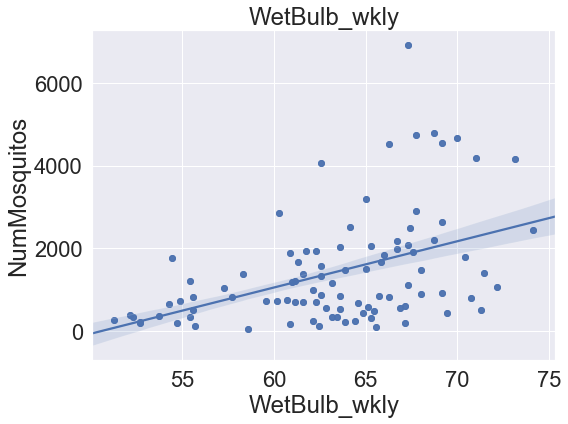

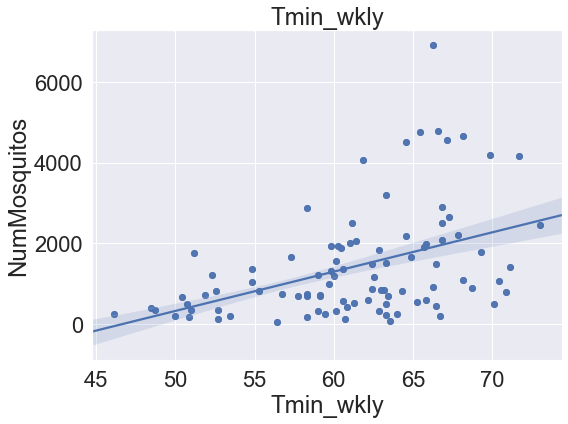

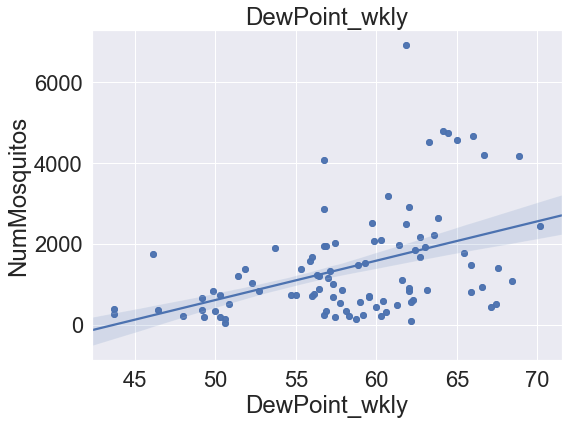

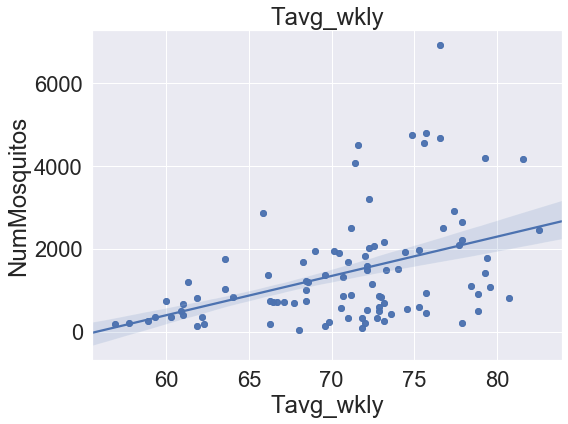

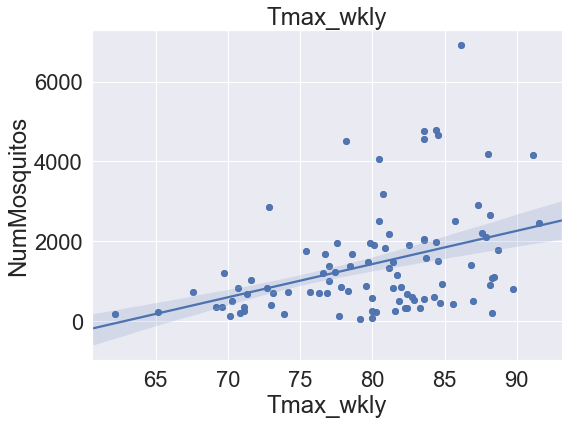

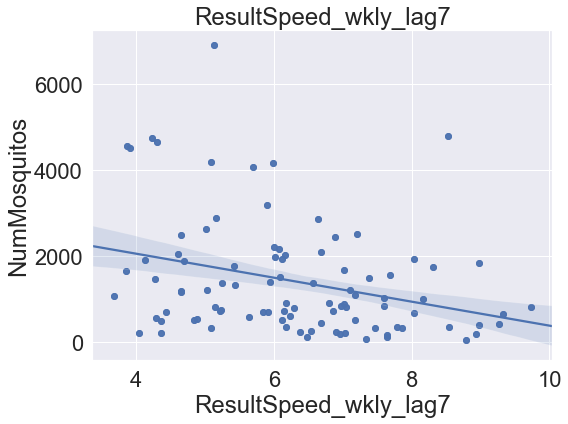

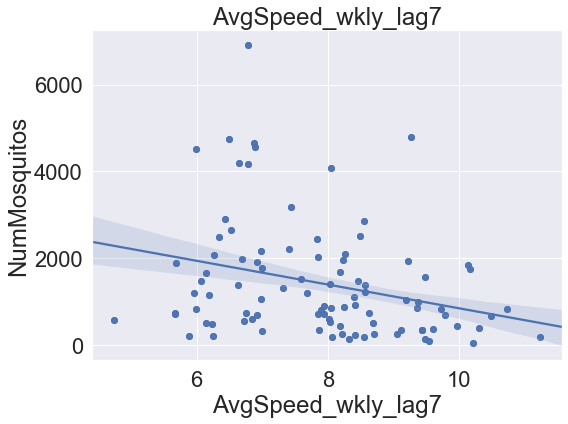

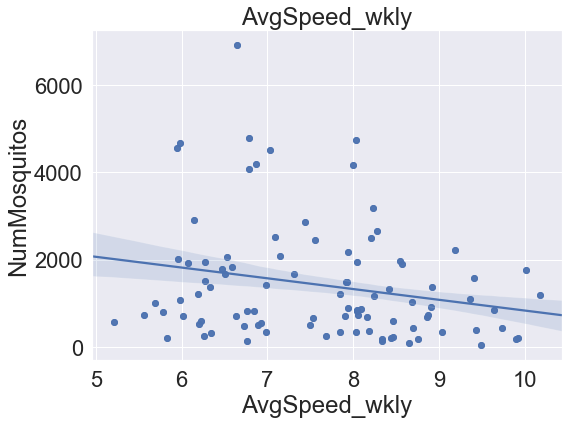

In [119]:
columns = ['WetBulb_wkly', 'Tmin_wkly' ,'DewPoint_wkly','Tavg_wkly','Tmax_wkly','ResultSpeed_wkly_lag7','AvgSpeed_wkly_lag7','AvgSpeed_wkly' ]
for col in columns:
    plt.figure(figsize=(8,6))
    sns.regplot(y='NumMosquitos', x=col,data = mosquitos_weather)
    plt.title(col)
    plt.tight_layout()
    plt.savefig(f'../images/mozzie_vs_{col}.png')
    plt.show()

### Occurrences of WNV over Time

In [18]:
merged_2007 = merged[merged['year'] == 2007].set_index('Test Date')
merged_2009 = merged[merged['year'] == 2009].set_index('Test Date')
merged_2011 = merged[merged['year'] == 2011].set_index('Test Date')
merged_2013 = merged[merged['year'] == 2013].set_index('Test Date')

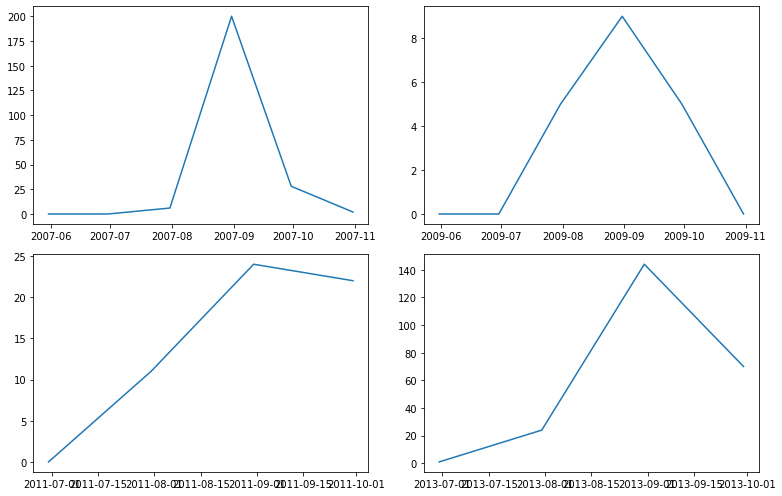

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
ax0, ax1, ax2, ax3 = axes.flat

ax0.plot(merged_2007[['WnvPresent']].resample('M').apply(sum))
ax1.plot(merged_2009[['WnvPresent']].resample('M').apply(sum))
ax2.plot(merged_2011[['WnvPresent']].resample('M').apply(sum))
ax3.plot(merged_2013[['WnvPresent']].resample('M').apply(sum))

plt.tight_layout()

In [20]:
sns.set()
# Default seaborn settings are pretty
plt.rcParams['figure.figsize'] = [15, 9]
# This makes your plots bigger
sns.set(font_scale=1.2)
# This increases the size of the label fonts

In [21]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0.0,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.71

In [22]:
bar_species1 = pd.DataFrame(merged['Species'].value_counts()).reset_index()

In [23]:
bar_species1 = pd.merge(bar_species1, pd.DataFrame(merged[merged['WnvPresent']==1]['Species'].value_counts()).reset_index(), how='left', on='index')

In [24]:
bar_species1.columns = ['species', 'num_observations', 'obs_w_wnv']

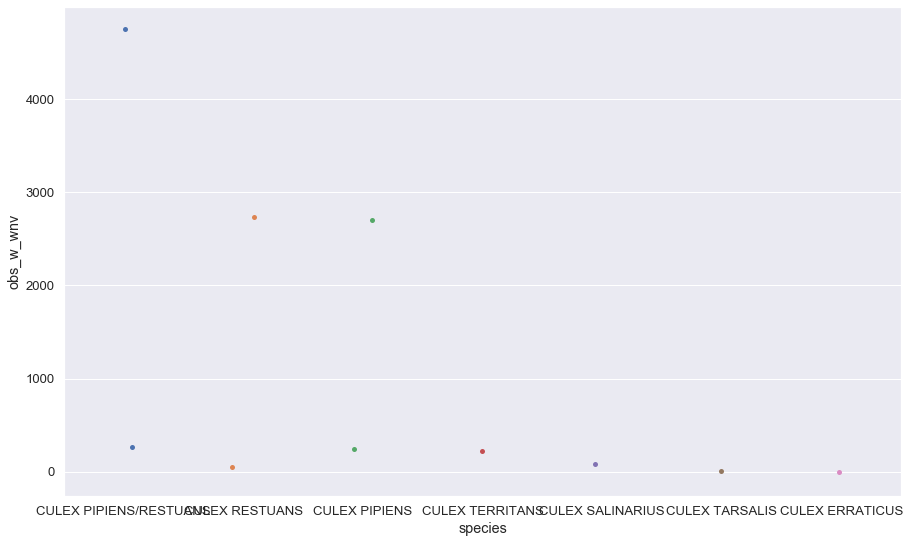

In [25]:
sns.stripplot(x="species", y="num_observations", data=bar_species1)
sns.stripplot(x="species", y="obs_w_wnv", data=bar_species1)

In [26]:
bar_species1

,species,num_observations,obs_w_wnv
0,CULEX PIPIENS/RESTUANS,4752,262.0
1,CULEX RESTUANS,2740,49.0
2,CULEX PIPIENS,2699,240.0
3,CULEX TERRITANS,222,NaN
4,CULEX SALINARIUS,86,NaN
5,CULEX TARSALIS,6,NaN
6,CULEX ERRATICUS,1,NaN


In [27]:
merged['Species'] = merged['Species'].str.replace('CULEX ', '')

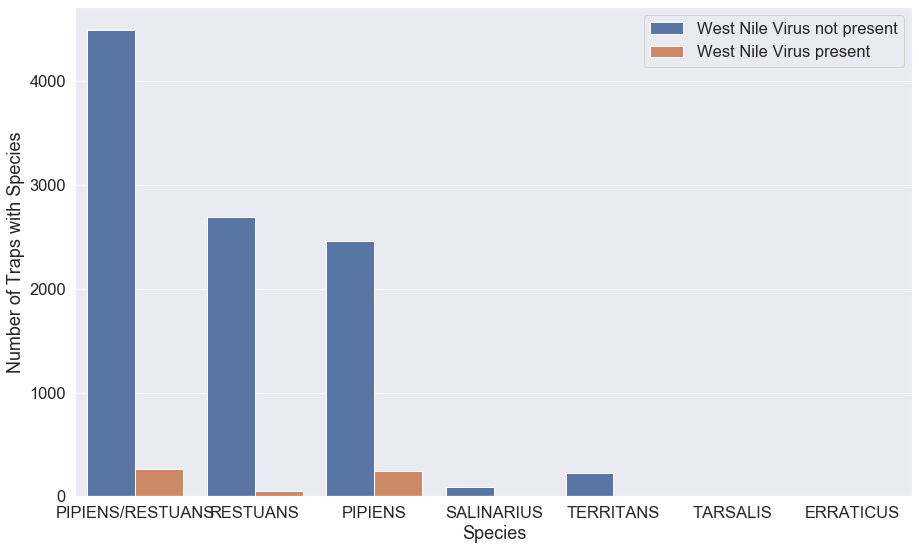

In [28]:
sns.set(font_scale=1.5)
sns.countplot(x='Species', hue='WnvPresent', data=merged)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.show()

Text(0, 0.5, 'Average Number of Mosquitos in Trap')

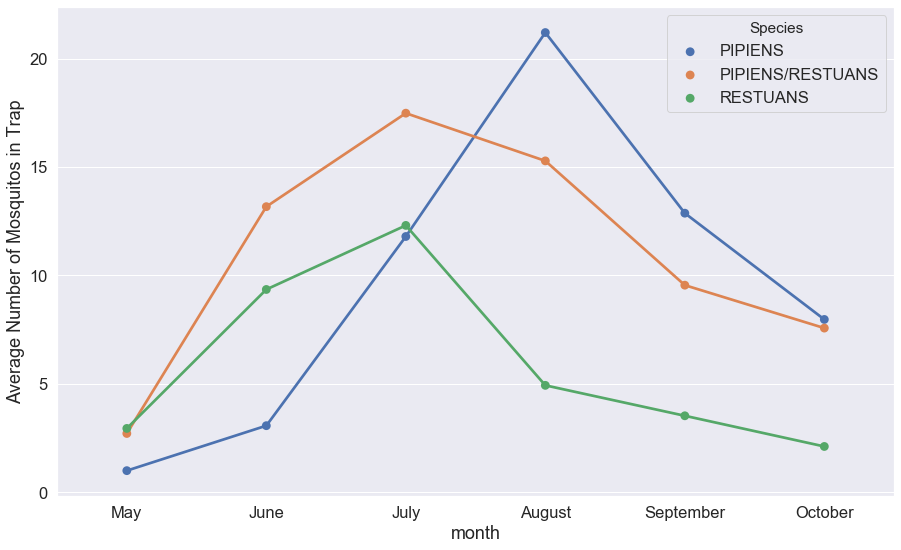

In [29]:
_ = sns.pointplot(x='month', y="NumMosquitos", hue='Species', data=merged[merged['Species'].isin(['PIPIENS', 'PIPIENS/RESTUANS', 'RESTUANS'])].groupby(['month', 'Species'], as_index=False)['NumMosquitos'].mean())
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
#plt.legend(['Culex Pipiens', 'Culex Pipiens/Restuans', 'Culex Restuans'])

### Feature creation: Total mosquitos
mosquito count maxes at 50 and then is new entry

In [30]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date
0,2007-05-29,PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
1,2007-05-29,RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
2,2007-05-29,RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT
3,2007-05-29,PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0.0,2011-07-09
4,2007-05-29,RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,4

In [31]:
merged[merged.NumMosquitos == 50]
merged.groupby(['Test Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum().sort_values('NumMosquitos', ascending=False).head()

,Test Date,Trap,Species,NumMosquitos
1450,2007-08-16,T115,PIPIENS,2532
565,2007-07-25,T115,PIPIENS,2356
1901,2007-08-28,T115,PIPIENS,2207
1196,2007-08-08,T138,PIPIENS,1658
2055,2007-09-05,T115,PIPIENS,1648


In [32]:
merged = pd.merge(merged, merged.groupby(['Test Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum(), how='left', on=['Test Date', 'Trap', 'Species'])

In [33]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos_x,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date,NumMosquitos_y
0,2007-05-29,PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
1,2007-05-29,RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
2,2007-05-29,RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
3,2007-05-29,PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0.0,2011-07-09,1
4,2007-05-29,RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,

In [34]:
impact=merged.groupby(['AddressNumberAndStreet', 'Trap'], as_index=False)['WnvPresent', 'NumMosquitos_x'].sum().sort_values('WnvPresent')
#train[train['Year']==2009].groupby('Date', as_index=False)['WnvPresent'].sum()
#train[['NumMosquitos']].sum()
#train[(train['Trap']=='T115') | (train['Trap']=='T900') | (train['Trap']=='T138')]

In [35]:
# T115 Mos = 21,668; WNV = 41 - South Doty Avenue, Chicago, IL, USA 41.673408	-87.599862
# T900 Mos = 15,386; WNV = 66 - ORD Terminal 5, O'Hare International Airport, USA 41.974689	-87.890615
# T138 Mos = 9,936; WNV = 16 - South Stony Island Avenue, Chicago, IL, USA 41.726465	-87.585413
#Total = 135,039

In [36]:
print(21668/135039)
print(15386/135039)
print(9936/135039)

0.16045734935833353
0.1139374551055621
0.07357874391842356


In [37]:
impact['percent_virus'] = impact['WnvPresent']/impact['NumMosquitos_x']

In [38]:
impact.sort_values('WnvPresent', ascending=False).head(10)

,AddressNumberAndStreet,Trap,WnvPresent,NumMosquitos_x,percent_virus
7,"1000 W OHARE AIRPORT, Chicago, IL",T900,66,15386,0.004290
18,"1200 S DOTY AVE, Chicago, IL",T115,41,21668,0.001892
72,"4100 N OAK PARK AVE, Chicago, IL",T002,18,3710,0.004852
4,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16,9936,0.001610
79,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14,1346,0.010401
128,"8200 S KOSTNER AVE, Chicago, IL",T225,11,2014,0.005462
60,"3600 N PITTSBURGH AVE, Chicago, IL",T011,11,1311,0.008391
45,"2400 E 105TH ST, Chicago, IL",T128,11,3315,0.003318
115,"7000 N MOSELL AVE, Chicago, IL",T008,10,2668,0.003748
8,"1000 W OHARE, Chicago, IL",T903,10,2327,0.004297


In [39]:
impact.sort_values('percent_virus', ascending=False).head(25)

,AddressNumberAndStreet,Trap,WnvPresent,NumMosquitos_x,percent_virus
99,"6000 W ROSCOE ST, Chicago, IL",T005,2,50,0.040000
97,"6000 N AVONDALE AVE, Chicago, IL",T006,4,107,0.037383
109,"6500 N OAK PARK AVE, Chicago, IL",T143,6,230,0.026087
123,"7900 W FOSTER AVE, Chicago, IL",T015,4,169,0.023669
125,"8100 E 91ST ST, Chicago, IL",T107,2,86,0.023256
89,"5200 S NORDICA, Chicago, IL",T070,2,90,0.022222
75,"4200 W 31ST ST, Chicago, IL",T036,1,52,0.019231
69,"4000 N AUSTIN AVE, Chicago, IL",T142,1,58,0.017241
111,"6600 S KILPATRICK AVE, Chicago, IL",T156,1,61,0.016393
71,"4000 S DEARBORN ST, Chicago, IL",T081,3,207,0.014493


In [40]:
merged[merged.Trap == 'T230'].groupby('year')['NumMosquitos_x', 'WnvPresent'].sum()

,NumMosquitos_x,WnvPresent
year,,
2009,24,1
2011,227,1
2013,393,5


In [41]:
merged[merged['Test Date']=='2009-06-22'].head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos_x,WnvPresent,Station,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date,NumMosquitos_y
4272,2009-06-22,PIPIENS/RESTUANS,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,19,0,2,2009,6,26,0 days 15:14:00.000000000,89,70,80,10,67,71,0.06,29.15,29.77,5.3,12,7.2,81.142857,64.571429,73.142857,3.428571,62.714286,66.714286,0.774286,29.092857,29.804286,6.171429,18.142857,7.942857,71.142857,52.714286,62.142857,-5.285714,50.0,55.428571,0.05,29.225714,29.947143,6.071429,5.571429,6.985714,69.142857,47.428571,58.428571,-6.571429,46.285714,52.571429,0.09,29.238571,29.967143,6.171429,10.571429,7.871429,73.285714,51.142857,62.428571,-0.857143,49.857143,55.0,0.312857,29.107143,29.825714,3.914286,23.142857,7.5,NaN,NaN,NaN,NaT,19
4273,2009-06-22,RESTUANS,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,36,0,2,2009,6,26,0 days 15:14:00.000000000,89,70,80,10,67,71,0.06,29.15,29.77,5.3,12,7.2,81.142857,64.571429,73.142857,3.428571,62.714286,66.714286,0.774286,29.092857,29.804286,6.171429,18.142857,7.942857,71.142857,52.714286,62.142857,-5.285714,50.0,55.428571,0.05,29.225714,29.947143,6.071429,5.571429,6.985714,69.142857,47.428571,58.428571,-6.571429,46.285714,52.571429,0.09,29.238571,29.967143,6.171429,10.571429,7.871429,73.285714,51.142857,62.428571,-0.857143,49.857143,55.0,0.312857,29.107143,29.825714,3.914286,23.142857,7.5,NaN,NaN,NaN,NaT,36
4274,2009-06-22,PIPIENS/RESTUANS,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,23,0,1,2009,6,26,0 days 15:14:00.000000000,89,68,79,9,67,71,0.09,29.09,29.79,4.0,11,5.6,81.142857,64.571429,73.142857,3.428571,62.714286,66.714286,0.774286,29.092857,29.804286,6.171429,18.142857,7.942857,71.142857,52.714286,62.142857,-5.285714,50.0,55.428571,0.05,29.225714,29.947143,6.071429,5.571429,6.985714,69.142857,47.428571,58.428571,-6.571429,46.285714,52.571429,0.09,29.238571,29.967143,6.171429,10.571429,7.871429,73.285714,51.142857,62.428571,-0.857143,49.857143,55.0,0.312857,29.107143,29.825714,3.914286,23.142857,7.5,NaN,NaN,NaN,NaT,1520
4275,2009-06-22,PIPIENS/RESTUANS,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,1,2009,6,26,0 days 15:14:00.000000000,89,68,79,9,67,71,0.09,29.09,29.79,4.0,11,5.6,81.142857,64.571429,73.142857,3.428571,62.714286,66.714286,0.774286,29.092857,29.804286,6.171429,18.142857,7.942857,71.142857,52.714286,62.142857,-5.285714,50.0,55.428571,0.05,29.225714,29.947143,6.071429,5.571429,6.985714,69.142857,47.428571,58.428571,-6.571429,46.285714,52.571429,0.09,29.238571,29.967143,6.171429,10.571429,7.871429,73.285714,51.142857,62.428571,-0.857143,49.857143,55.0,0.312857,29.107143,29.825714,3.914286,23.142857,7.5,NaN,NaN,NaN,NaT,1520
4276,2009-06-22,PIPIENS/RESTUANS,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,1,2009,6,26,0 days 15:14:00.000000000,89,68,79,9,67,71,0.09,29.09,29.79,4.0,11,5.6,81.142857,64.571429,73.142857,3.428571,62.714286,66.714286,0.774286,29.092857,29.80

In [42]:
import matplotlib
matplotlib.__version__

'3.1.2'

In [43]:
merged.groupby(['year', 'month'], as_index=False)['NumMosquitos_x'].mean()

,year,month,NumMosquitos_x
0,2007,5,1.600000
1,2007,6,2.431818
2,2007,7,12.520000
3,2007,8,19.519512
4,2007,9,12.015504
5,2007,10,8.085308
6,2009,5,3.220339
7,2009,6,12.785467
8,2009,7,11.699338
9,2009,8,6.272727


Text(0, 0.5, 'Average Number of Mosquitos in Trap')

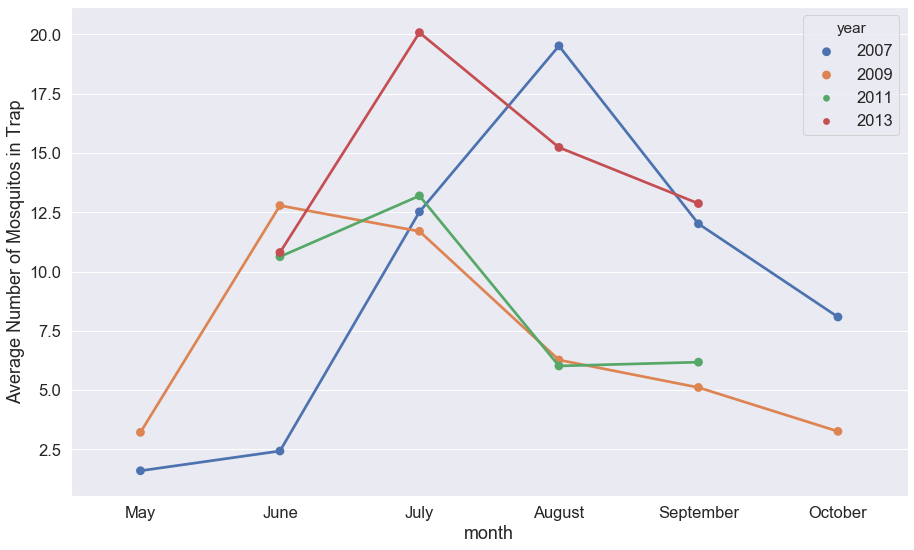

In [44]:
_ = sns.pointplot(x='month', y="NumMosquitos_x", hue="year", data=merged.groupby(['year', 'month'], as_index=False)['NumMosquitos_x'].mean())
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')


Text(0, 0.5, 'Average Cases of WNV in Trap')

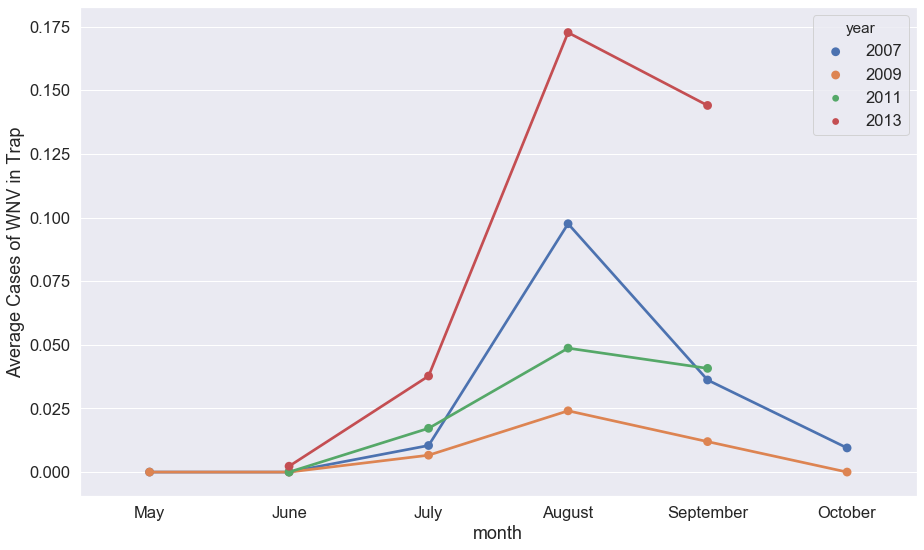

In [45]:
_ = sns.pointplot(x='month', y="WnvPresent", hue="year", data=merged.groupby(['year', 'month'], as_index=False)['WnvPresent'].mean(),)


_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')



Text(0, 0.5, 'Average Cases of WNV in Trap')

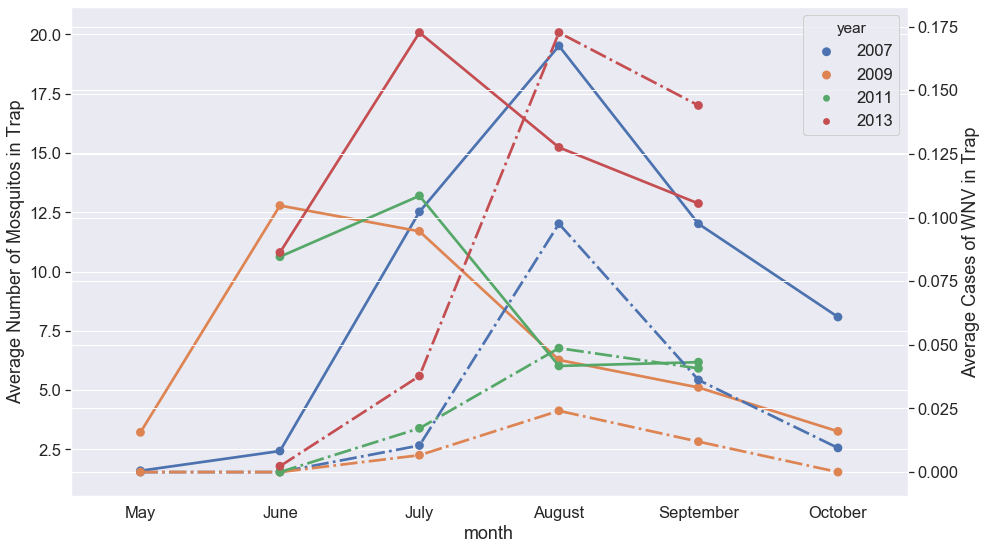

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='month', y="NumMosquitos_x", hue="year", data=merged.groupby(['year', 'month'], as_index=False)['NumMosquitos_x'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='month', y="WnvPresent", hue="year", linestyles='-.', data=merged.groupby(['year', 'month'], as_index=False)['WnvPresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')



In [47]:
merged.groupby('year')['Trap'].count()

year
2007    3811
2009    2249
2011    2054
2013    2392
Name: Trap, dtype: int64

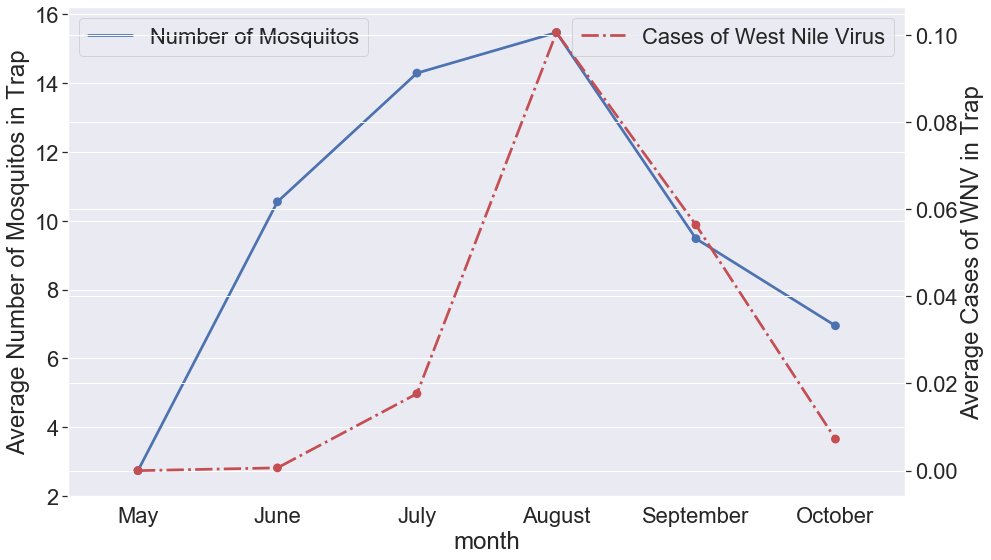

In [48]:
sns.set(font_scale=2.0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='month', y="NumMosquitos_x", data=merged.groupby(['month'], as_index=False)['NumMosquitos_x'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Number of Mosquitos'], loc=2)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='month', y="WnvPresent", linestyles='-.', color='r', data=merged.groupby(['month'], as_index=False)['WnvPresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')
plt.legend(['Cases of West Nile Virus'], loc=1)


There is no mosquito information so our predictions have to be based on weather, location, time, and spraying

In [49]:
# We need to create one line per date:
station1 = merged[merged['Station']==1]
station2 = merged[merged['Station']==2]
station1 = station1.drop('Station', axis=1)
station2 = station2.drop('Station', axis=1)

In [50]:
station1.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos_x,WnvPresent,year,month,week,daylight,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tmax_wkly,Tmin_wkly,Tavg_wkly,Depart_wkly,DewPoint_wkly,WetBulb_wkly,PrecipTotal_wkly,StnPressure_wkly,SeaLevel_wkly,ResultSpeed_wkly,ResultDir_wkly,AvgSpeed_wkly,Tmax_wkly_lag7,Tmin_wkly_lag7,Tavg_wkly_lag7,Depart_wkly_lag7,DewPoint_wkly_lag7,WetBulb_wkly_lag7,PrecipTotal_wkly_lag7,StnPressure_wkly_lag7,SeaLevel_wkly_lag7,ResultSpeed_wkly_lag7,ResultDir_wkly_lag7,AvgSpeed_wkly_lag7,Tmax_wkly_lag14,Tmin_wkly_lag14,Tavg_wkly_lag14,Depart_wkly_lag14,DewPoint_wkly_lag14,WetBulb_wkly_lag14,PrecipTotal_wkly_lag14,StnPressure_wkly_lag14,SeaLevel_wkly_lag14,ResultSpeed_wkly_lag14,ResultDir_wkly_lag14,AvgSpeed_wkly_lag14,Tmax_wkly_lag21,Tmin_wkly_lag21,Tavg_wkly_lag21,Depart_wkly_lag21,DewPoint_wkly_lag21,WetBulb_wkly_lag21,PrecipTotal_wkly_lag21,StnPressure_wkly_lag21,SeaLevel_wkly_lag21,ResultSpeed_wkly_lag21,ResultDir_wkly_lag21,AvgSpeed_wkly_lag21,midpt_Lat,midpt_Lon,Cluster,Spray Date,NumMosquitos_y
0,2007-05-29,PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
1,2007-05-29,RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
2,2007-05-29,RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1
3,2007-05-29,PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,41.982275,-87.809953,0.0,2011-07-09,1
4,2007-05-29,RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857

In [51]:
weather = pd.merge(station1, station2, on='Test Date')

In [52]:
weather = weather.set_index('Test Date')

In [53]:
weather.head()

,Species_x,Trap_x,AddressNumberAndStreet_x,Latitude_x,Longitude_x,AddressAccuracy_x,NumMosquitos_x_x,WnvPresent_x,year_x,month_x,week_x,daylight_x,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_wkly_x,Tmin_wkly_x,Tavg_wkly_x,Depart_wkly_x,DewPoint_wkly_x,WetBulb_wkly_x,PrecipTotal_wkly_x,StnPressure_wkly_x,SeaLevel_wkly_x,ResultSpeed_wkly_x,ResultDir_wkly_x,AvgSpeed_wkly_x,Tmax_wkly_lag7_x,Tmin_wkly_lag7_x,Tavg_wkly_lag7_x,Depart_wkly_lag7_x,DewPoint_wkly_lag7_x,WetBulb_wkly_lag7_x,PrecipTotal_wkly_lag7_x,StnPressure_wkly_lag7_x,SeaLevel_wkly_lag7_x,ResultSpeed_wkly_lag7_x,ResultDir_wkly_lag7_x,AvgSpeed_wkly_lag7_x,Tmax_wkly_lag14_x,Tmin_wkly_lag14_x,Tavg_wkly_lag14_x,Depart_wkly_lag14_x,DewPoint_wkly_lag14_x,WetBulb_wkly_lag14_x,PrecipTotal_wkly_lag14_x,StnPressure_wkly_lag14_x,SeaLevel_wkly_lag14_x,ResultSpeed_wkly_lag14_x,ResultDir_wkly_lag14_x,AvgSpeed_wkly_lag14_x,Tmax_wkly_lag21_x,Tmin_wkly_lag21_x,Tavg_wkly_lag21_x,Depart_wkly_lag21_x,DewPoint_wkly_lag21_x,WetBulb_wkly_lag21_x,PrecipTotal_wkly_lag21_x,StnPressure_wkly_lag21_x,SeaLevel_wkly_lag21_x,ResultSpeed_wkly_lag21_x,ResultDir_wkly_lag21_x,AvgSpeed_wkly_lag21_x,midpt_Lat_x,midpt_Lon_x,Cluster_x,Spray Date_x,NumMosquitos_y_x,Species_y,Trap_y,AddressNumberAndStreet_y,Latitude_y,Longitude_y,AddressAccuracy_y,NumMosquitos_x_y,WnvPresent_y,year_y,month_y,week_y,daylight_y,Tmax_y,Tmin_y,Tavg_y,Depart_y,DewPoint_y,WetBulb_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,Tmax_wkly_y,Tmin_wkly_y,Tavg_wkly_y,Depart_wkly_y,DewPoint_wkly_y,WetBulb_wkly_y,PrecipTotal_wkly_y,StnPressure_wkly_y,SeaLevel_wkly_y,ResultSpeed_wkly_y,ResultDir_wkly_y,AvgSpeed_wkly_y,Tmax_wkly_lag7_y,Tmin_wkly_lag7_y,Tavg_wkly_lag7_y,Depart_wkly_lag7_y,DewPoint_wkly_lag7_y,WetBulb_wkly_lag7_y,PrecipTotal_wkly_lag7_y,StnPressure_wkly_lag7_y,SeaLevel_wkly_lag7_y,ResultSpeed_wkly_lag7_y,ResultDir_wkly_lag7_y,AvgSpeed_wkly_lag7_y,Tmax_wkly_lag14_y,Tmin_wkly_lag14_y,Tavg_wkly_lag14_y,Depart_wkly_lag14_y,DewPoint_wkly_lag14_y,WetBulb_wkly_lag14_y,PrecipTotal_wkly_lag14_y,StnPressure_wkly_lag14_y,SeaLevel_wkly_lag14_y,ResultSpeed_wkly_lag14_y,ResultDir_wkly_lag14_y,AvgSpeed_wkly_lag14_y,Tmax_wkly_lag21_y,Tmin_wkly_lag21_y,Tavg_wkly_lag21_y,Depart_wkly_lag21_y,DewPoint_wkly_lag21_y,WetBulb_wkly_lag21_y,PrecipTotal_wkly_lag21_y,StnPressure_wkly_lag21_y,SeaLevel_wkly_lag21_y,ResultSpeed_wkly_lag21_y,ResultDir_wkly_lag21_y,AvgSpeed_wkly_lag21_y,midpt_Lat_y,midpt_Lon_y,Cluster_y,Spray Date_y,NumMosquitos_y_y
Test Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-29,PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,5,22,0 days 14:56:00.000000000,88,60,74,10,58,65,0.0,29.39,30.11,5.8,18,6.5,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,1,RESTUANS,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007,5,22,0 days 14:56:00.000000000,88,65,77,13,59,66,0.0,29.44,30.09,5.8,16,7.4,79.142857,56.428571,68.0,5.714286,50.571429,58.571429,0.152857,29.404286,30.125714,7.642857,16.571429,9.485714,73.571429,46.714286,60.285714,0.142857,40.0,49.714286,0.03,29.4,30.122857,8.785714,17.285714,10.214286,76.285714,52.857143,64.714286,7.571429,46.428571,55.142857,0.072857,29.297143,30.021429,8.557143,13.428571,10.542857,70.0,48.571429,59.571429,4.857143,41.428571,50.857143,0.0,29.388571,30.114286,10.357143,9.428571,11.342857,NaN,NaN,NaN,NaT,2
2007-05-29,PIP

In [54]:
weather['precip_avg'] = (weather['PrecipTotal_x'] + weather['PrecipTotal_y'])/2

weather['1wk_precip'] = weather['precip_avg'].rolling(7, min_periods=1).sum()

weather['2wk_precip'] = weather['precip_avg'].rolling(14, min_periods=1).sum()

weather['3wk_precip'] = weather['precip_avg'].rolling(21, min_periods=1).sum()

In [55]:
weather['temp_avg'] = (weather['Tavg_x'] + weather['Tavg_y'])/2

weather['1wk_tavg'] = weather['temp_avg'].rolling(7, min_periods=1).mean()

weather['2wk_tavg'] = weather['temp_avg'].rolling(14, min_periods=1).mean()

weather['3wk_tavg'] = weather['temp_avg'].rolling(21, min_periods=1).mean()

In [56]:
weather['tempmin_avg'] = (weather['Tmin_x'] + weather['Tmin_y'])/2

weather['1wk_mintemp'] = weather['tempmin_avg'].rolling(7, min_periods=1).min()

weather['2wk_mintemp'] = weather['tempmin_avg'].rolling(14, min_periods=1).min()

In [57]:
weather['dew_avg'] = (weather['DewPoint_x'] + weather['DewPoint_y'])/2

weather['1wk_dew'] = weather['dew_avg'].rolling(7, min_periods=1).mean()

weather['2wk_dew'] = weather['dew_avg'].rolling(21, min_periods=1).mean()

In [58]:
weather = weather.reset_index()

In [59]:
# merged = pd.merge(merged, weather, how='left', on='Test Date')

In [60]:
merged.shape

(10506, 79)